# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [ ]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [ ]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [ ]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
#мы уже привели данные к нужному виду, теперь нужно посмотреть, как влияет количество детей на процент возврата кредита в срок
#сгруппируем данные по количеству детей и посчитаем % просрочек для каждой группы
#так как во всех строках одинаковое количество, то общее число заемщиков можно считать по любой. Взяла пол.

data_children = data.pivot_table(index = ['children'], values = \
                                 ['gender', 'debt'], aggfunc = {"gender": "count", "debt": 'sum'})
data_children['доля должников, %'] = ((data_children['debt']/data_children['gender'])*100).round(2)
data_children = data_children.rename(columns = \
                                     {"debt": "кол-во должников", "gender": "всего заемщиков"})

data_children = data_children.sort_values(by = 'доля должников, %', ascending = False)
data_children

,кол-во должников,всего заемщиков,"доля должников, %"
children,,,
4,4,41,9.76
2,194,2052,9.45
1,444,4808,9.23
3,27,330,8.18
0,1063,14091,7.54
5,0,9,0.00


**Отсутствуют просрочки у семей с количеством детей, равным 5. Подозрительная цифра. Можно проверить, сколько всего таких семей, чтобы понять, есть ли ошибка в данных.**

In [ ]:
data.query("children == 5").agg({'children': 'count'})

children    9
dtype: int64

**Всего таких семей 9. В разрезе объема данных это значение я бы не назвала статистически значимым. Из 9 семей ни у кого не было просрочек - это хорошо. Однако, я бы взяла во внимание куда более значимые данные.**

**Вывод:**
Семьи с наибольшим количеством детей (с 5 не берем врасчет, так как выборка слишком маленькая) оказались наиболее склонны к долгам по кредитам. Думаю, это связано с большими расходами. Несмотря на поддержку государства, семьям среднего класса (особенно если учесть, что мать в декрете), тяжело обеспечивать 4 детей. Денег не хватает, берут новые кредиты, на гашение которых тоже не хватает денег. И так по кругу.

В то время как семьи, у которых детей нет, оказались менее склонны к этому. Думаю, это потому, что им важна хорошая кредитная история, так как, скорее всего, планируется ипотека и автокредиты.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
#аналогично прошлому заданию, решим текущее


data_family_status = data.pivot_table(index = ['family_status'], values = \
                                 ['gender', 'debt'], aggfunc = {"gender": "count", "debt": 'sum'})
data_family_status['доля должников, %'] = ((data_family_status['debt']/data_family_status['gender'])*100).round(2)
data_family_status = data_family_status.rename(columns = \
                                     {"debt": "кол-во должников", "gender": "всего заемщиков"})

data_family_status = data_family_status.sort_values(by = 'доля должников, %', ascending = False)
data_family_status

,кол-во должников,всего заемщиков,"доля должников, %"
family_status,,,
Не женат / не замужем,273,2796,9.76
гражданский брак,385,4134,9.31
женат / замужем,927,12261,7.56
в разводе,84,1189,7.06
вдовец / вдова,63,951,6.62


**Вывод:**

Холостые люди больше склонны к тому, чтобы не платить по кредитам. Думаю, связано с тем, что одному расплачиваться по долгам сложнее, чем делить это бремя с кем-то. Вдовы/вдовцы оказались более ответственными. Как правило, это люди пенсионного возраста, которые априори реже берут кредиты и более ответственно относятся к возврату долгов. При желании, можно проверить гипотезу с возрастом

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
#аналогично прошлому заданию, решим текущее
data_total_income = data.pivot_table(index = ['total_income_category'], values = \
                                 ['gender', 'debt'], aggfunc = {"gender": "count", "debt": 'sum'})
data_total_income['доля должников, %'] = ((data_total_income['debt']/data_total_income['gender'])*100).round(2)
data_total_income = data_total_income.rename(columns = \
                                     {"debt": "кол-во должников", "gender": "всего заемщиков"})

data_total_income = data_total_income.sort_values(by = 'доля должников, %', ascending = False)
data_total_income

,кол-во должников,всего заемщиков,"доля должников, %"
total_income_category,,,
E,2,22,9.09
C,1353,15921,8.50
A,2,25,8.00
B,354,5014,7.06
D,21,349,6.02


**Вывод:**

Ранее мы уже категоризировали данные по уровню дохода, где E - самое маленькое значение, а A - самое высокое.
Очевидно, что люди с самым низким уровнем дохода наиболее склонны к долгам по кредитам. Чаще всего это люди с низкой финансовой грамотностью, которые берут кредиты на гашение других кредитов, в итоге остаются без денег, попадают в просрочки и рано или поздно оказываются в ситуации, когда новый кредит уже не взять, а старые уже висят.

Наиболее ответственными оказались люди с уровнем дохода чуть ниже среднего. Как правило, это люди, которые не хотят влезать в большую долговую яму и берут больше важных кредитов, чем просто мелких.


**Однако, по всем категориям, кроме B и C данных так мало, что, по аналогии с количеством детей, рассматривать стоит только эти две. Остальне не так статистически значимы и имеют большую погрешность. Следовательно, люди, доход которых от 200001 до 1000000 менее склонны к просрочкам, чем те, кто получает зарплату в диапазоне от 50001 до 200000. Я так же захотела посмотреть отдельно по этим двум категориям, на что именно они чаще берут кредиты и по каким целям больший процент просрочек. Здесь можно увидеть, что люди, которые берут кредит на образование, более склонны к просрочкам чем те, кто берет кредит на покупку недвижимости. Здесь, при желании, так же можно проверить гипотезу о взаимосвязи категории и возраста**

In [ ]:
data.query('total_income_category == "B" | total_income_category == "C"').groupby('purpose_category')['debt'].mean().sort_values(ascending = False)

purpose_category
получение образования       0.093750
операции с автомобилем      0.092791
проведение свадьбы          0.079190
операции с недвижимостью    0.073046
Name: debt, dtype: float64

<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

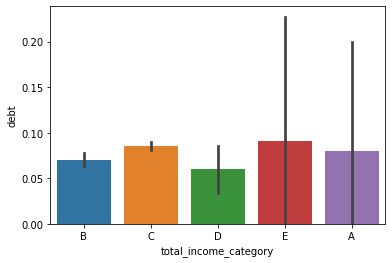

In [ ]:
import seaborn as sns
sns.barplot(data=data, x='total_income_category', y='debt')

In [ ]:
data.query('total_income_category == "B" | total_income_category == "C"').groupby('purpose_category')['debt'].mean().sort_values(ascending = False)

purpose_category
получение образования       0.093750
операции с автомобилем      0.092791
проведение свадьбы          0.079190
операции с недвижимостью    0.073046
Name: debt, dtype: float64

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [ ]:
data_purpose_category = data.pivot_table(index = ['purpose_category'], values = \
                                 ['gender', 'debt'], aggfunc = {"gender": "count", "debt": 'sum'})
data_purpose_category['доля должников, %'] = ((data_purpose_category['debt']/data_purpose_category['gender'])*100).round(2)
data_purpose_category = data_purpose_category.rename(columns = \
                                     {"debt": "кол-во должников", "gender": "всего заемщиков"})

data_purpose_category = data_purpose_category.sort_values(by = 'доля должников, %', ascending = False)
data_purpose_category

,кол-во должников,всего заемщиков,"доля должников, %"
purpose_category,,,
операции с автомобилем,400,4279,9.35
получение образования,369,3988,9.25
проведение свадьбы,183,2313,7.91
операции с недвижимостью,780,10751,7.26


**Вывод:**
Цель кредита влияет на процент просрочек. Как правило, автомобили берут более молодые заемщики, которые еще не умеют адекватно пользоваться деньгами и с бОльшей вероятностью допускают просрочки. Недвижимость же выбирают более состоятельные. При желании, можно проверить гипотезу с возрастом

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*

Данные могут быть повреждены при экспорте/импорте, так же может сыграть человеческий фактор, или же пропуск может зависеть от типа поля. Например, при регистрации на сайте далеко не все согласны на email-рассылку. Соответственно, данное поле будет пустым.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*
Из-за выбросов. Если значение какое-то значение выборки слишком большое или слишком маленькое, то на среднее значение (из-за особенностей расчета) они будут очень сильно влиять. Пример - средняя зарплата по стране, которая не соответствует действительности. В то время как медианное значение - наиболее близкое к реальности, так как не восприимчиво к выбросам.

### Шаг 4: общий вывод.

Нет какого-то одного фактора, который влияет на процент просрочек по кредитам. Как показало исследование, это совокупность из назначения кредита, зарплаты, количества детей, семейного положения. Все это в общей сумме позволяет принять решение о том, давать ли человеку одобрение на новый заем или нет. Однако, я бы добавила в данные возраст, так как, по моему мнению, он тоже может существенно влиять на наличие просрочек. Более молодые, как правило, более инфантильные и не заботятся о своей кредитной истории, как люди среднего и пенсионного возрастов.

В процессе работы над данными были выделены категории заемщиков по уровню дохода, целям кредита, количеству детей, типу занятости, семейному положению. А также выявлены зависимости между данными категориями и процентов просрочек.

Исходя из полученных данных, можно сделать вывод, что наиболее рискованным клиентом для банка является человек, у которого 4 детей, он не в браке, имеет низкий уровень дохода и хочет взять кредит на покупку чего-то не столь серъезного (по сумме кредита), чем недвижимость. Возможно так же исключение одного из критериев (например, маловероятно, что у одинокого человека будет 4 детей, но он все равно будет в группе риска для банка, так как по остальным критериям подходит). Если предположить, что все 4 пункта это 100% риск, то наиболее надежными для банка заемщиками я бы считала клиентов, у которых % риска 25% и ниже. Соответственно, средний уровень будет у тех, у кого совпадение 50%, и высокий у тех, у кого от 75% до 100%. В идеале, для оценки риска можно учитывать возраст и регион проживания (в разных регионах разный уровень жизни).

Так же, по причине недостаточности данных в других категориях дохода, мы можем делать весомые выводы только по категориям B и С.Следовательно (как и написано в комментарии 2), более рискованный клиент будет иметь доход от 500001 до 200000 рублей.